## Astronomical telescope
In this example, Cassagrain telescope from the previous example is extended. Five different positions of an equatorial mount telescope while tracking an astronomical source are illustrated here. 

In [1]:
# %matplotlib inline
# %matplotlib tk
# %matplotlib qt5
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#
import PyAstroPol as pap
pap.roundOffDisplay(5)

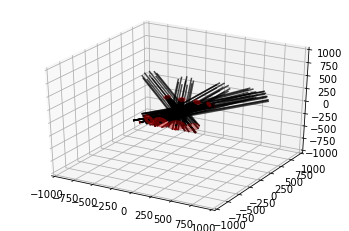

In [2]:
Fig = plt.figure()                                             
Ax = Fig.add_subplot(111, projection='3d')
for i in np.linspace(-60,60,5):                                         # Change Hour Angle 
    S = pap.AstroSource(10, Clear=180, Dec=30.0, HA=i, Lat=30.0)        # Astronomical source
    #
    M1 = pap.Surface(200, R=-2000, Mirror=True, n2=1.1+6.8j, iDia=40)   # Primary mirror with hole
    M1.translateOrigin(z=400)                                                       
    M1.rotateAboutY(S.ThetaY)                                           # Adjust orientation to source
    M1.rotateAboutX(S.ThetaX)
    #
    M2 = pap.Surface(100, R=-500, Mirror=True, n2=1.1+6.8j)             # Secondary mirror with hole
    M2.translateOrigin(z=-400)
    M2.rotateAboutY(S.ThetaY)                                           # Adjust orientation to source
    M2.rotateAboutX(S.ThetaX)
    #       
    D = pap.Detector(50)                                                # Usual detector
    D.translateOrigin(z=520)
    D.rotateAboutY(S.ThetaY)                                            # Adjust orientation to source
    D.rotateAboutX(S.ThetaX)
    #
    Sys = pap.System(S, [M1, M2], D)
    Sys.propagateRays()
    Sys.draw(Ax)
    pap.adjustAspect(Ax, 2000.0)
plt.show()